#Excercise-1

In [29]:
import numpy as np
import pandas as pd
import time

In [30]:
# Set1: {2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24}
# Set2: {3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 19, 21, 23}
# Set3: {3, 4, 6, 6, 9, 11, 11, 12, 15, 17, 17, 17, 18, 21, 21, 24}
# Set4: {2, 3, 4, 7, 11, 11, 12, 13, 13, 14, 14, 16, 19, 21, 22, 24}
# Target1: 140
# Target2: 165
# Target3: 182


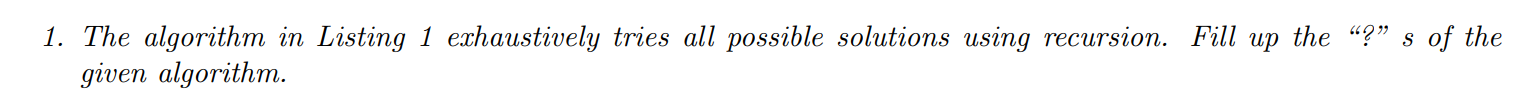

In [31]:

def is_subset_sum_recursive(arr, n, target, subset=[]):
    # Base Case: If target sum is achieved
    if target == 0:
        print("Subset with the given sum exists:", subset)
        return True

    # Base Case: If all elements are traversed but target sum is not achieved
    if n == 0 and target != 0:
        return False

    # If the last element is greater than the target, ignore it
    if arr[n - 1] > target:
        return is_subset_sum_recursive(arr, n - 1, target, subset)

    # Check if sum can be obtained by including or excluding the last element
    return is_subset_sum_recursive(arr, n - 1, target, subset) or \
           is_subset_sum_recursive(arr, n - 1, target - arr[n - 1], subset + [arr[n - 1]])



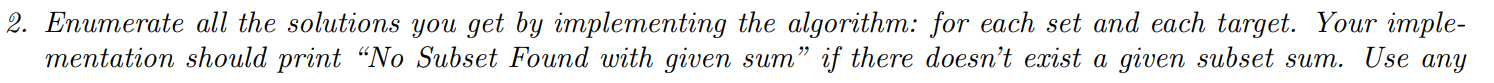
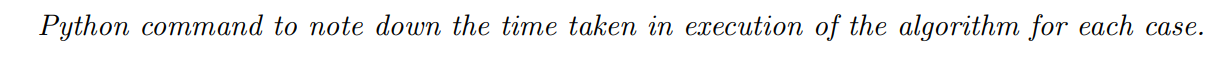

In [32]:
Set1= [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24]
Set2= [3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 19, 21, 23]
Set3= [3, 4, 6, 6, 9, 11, 11, 12, 15, 17, 17, 17, 18, 21, 21, 24]
Set4= [2, 3, 4, 7, 11, 11, 12, 13, 13, 14, 14, 16, 19, 21, 22, 24]
Target1= 140
Target2= 165
Target3= 182


In [33]:
sets=[Set1,Set2,Set3,Set4]
Target=[Target1,Target2,Target3]
time_algo_1=[]
for i in range(len(sets)):
  time_value=[]
  for j in range(len(Target)):

    arr=list(sets[i])
    start=time.time()
    n=len(sets[i])
    target=Target[j]
    status=is_subset_sum_recursive(arr, n, target, subset=[])
    end=time.time()
    print(f'for target value {Target[j]} status by set{sets[i]} is {status}')

    time_value.append(end-start)
    if status==False:
      print('Time Taken :',end-start)
      # time_value.append(end-start)
      print(f'“No Subset Found with given sum”')
      print('..........................................................................')
    else:
      print('Time Taken :',end-start)
      # time_value.append(end-start)
      print('..........................................................................')
  time_algo_1.append(time_value)


Subset with the given sum exists: [22, 20, 18, 16, 14, 12, 9, 9, 8, 6, 4, 2]
for target value 140 status by set[2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24] is True
Time Taken : 0.016705751419067383
..........................................................................
Subset with the given sum exists: [24, 22, 20, 16, 14, 12, 10, 9, 9, 9, 8, 6, 4, 2]
for target value 165 status by set[2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24] is True
Time Taken : 0.022821903228759766
..........................................................................
for target value 182 status by set[2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24] is False
Time Taken : 0.020166873931884766
“No Subset Found with given sum”
..........................................................................
Subset with the given sum exists: [21, 17, 15, 13, 12, 12, 12, 11, 9, 7, 5, 3, 3]
for target value 140 status by set[3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 19, 21, 23] is True
Time Taken

In [34]:
time_algo_1

[[0.016705751419067383, 0.022821903228759766, 0.020166873931884766],
 [0.008014678955078125, 0.026581287384033203, 0.03592991828918457],
 [0.007981300354003906, 0.019934892654418945, 0.023634910583496094],
 [0.01118159294128418, 0.020540475845336914, 0.026282548904418945]]

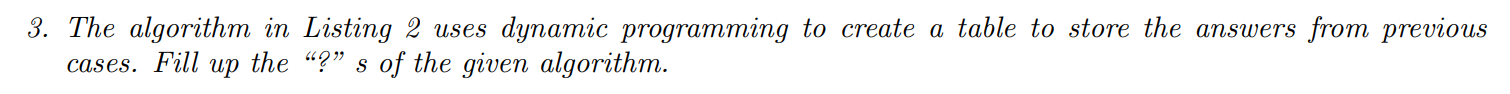

In [35]:

def subset_sum(numbers, target_sum):
    n = len(numbers)
    dp = [[False] * (target_sum + 1) for _ in range(n + 1)]
    numbers=list(numbers)
    # Base case initialization (when sum is 0)
    for i in range(n + 1):
        dp[i][0] = True

    # Fill the dp table
    for i in range(1, n + 1):
        for j in range(1, target_sum + 1):
            # If the current number is greater than the target sum,
            # then the current number cannot be included in the subset
            if numbers[i - 1] > j:
                dp[i][j] = dp[i - 1][j]
            else:
                # Check if it's possible to achieve the target sum
                # by either including or excluding the current number
                dp[i][j] = dp[i - 1][j] or dp[i - 1][j - numbers[i - 1]]

    # Trace back to find the elements included in the subset sum
    subset = []
    i, j = n, target_sum
    while i > 0 and j > 0:
        if dp[i][j] == dp[i - 1][j]:
            i -= 1
        else:
            subset.append(numbers[i - 1])
            j -= numbers[i - 1]
            i -= 1

    return dp[n][target_sum], subset[::-1]


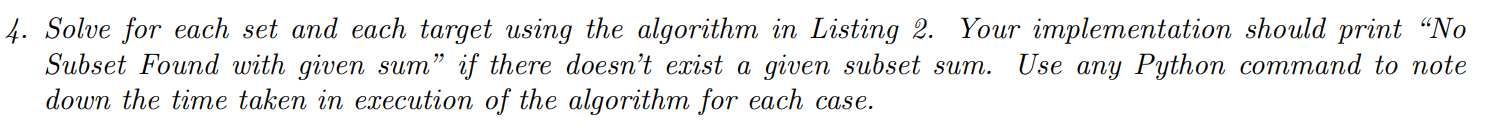

In [36]:
subset_sum(Set1,Target1)

(True, [2, 4, 6, 8, 9, 9, 12, 14, 16, 18, 20, 22])

In [37]:
sets=[Set1,Set2,Set3,Set4]
Target=[Target1,Target2,Target3]
time_values=[]
time_algo_2=[]
for i in range(len(sets)):
  t2=[]
  for j in range(len(Target)):
    time_status=[]
    start=time.time()
    status,ordered_set=subset_sum(sets[i],Target[j])
    end=time.time()
    print(f'for target value {Target[j]} status by set{sets[i]} is {status}')
    time_diff=end-start
    t2.append(time_diff)
    if status==True:
      time_status.extend([time_diff,status])
      time_values.append(time_status)
      print(f'the orderd set we get is {ordered_set}')
      print('Time taken: ',end-start)
      print('_________________________________________________________________________________________________________________')
      print()
    else:
      time_status.extend([time_diff,status])
      time_values.append(time_status)
      print(f'“No Subset Found with given sum”')
      print('Time taken: ',end-start)
      print('__________________________________________________________________________________________________________________')
      print()
  time_algo_2.append(t2)

for target value 140 status by set[2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24] is True
the orderd set we get is [2, 4, 6, 8, 9, 9, 12, 14, 16, 18, 20, 22]
Time taken:  0.0005459785461425781
_________________________________________________________________________________________________________________

for target value 165 status by set[2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24] is True
the orderd set we get is [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 20, 22, 24]
Time taken:  0.0006577968597412109
_________________________________________________________________________________________________________________

for target value 182 status by set[2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24] is False
“No Subset Found with given sum”
Time taken:  0.0011439323425292969
__________________________________________________________________________________________________________________

for target value 140 status by set[3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 19, 21

In [38]:
time_algo_2

[[0.0005459785461425781, 0.0006577968597412109, 0.0011439323425292969],
 [0.0008041858673095703, 0.0009069442749023438, 0.0011546611785888672],
 [0.0009608268737792969, 0.0008099079132080078, 0.0007519721984863281],
 [0.0005674362182617188, 0.0006549358367919922, 0.0013360977172851562]]

In [39]:
print(time_values[0][1])

True


In [40]:
from prettytable import PrettyTable

In [41]:
# table=PrettyTable(['set','Target','Time Taken','Status of sum'])
# for i in range(len(time_values)):

#   if i<3:

#     table.add_row([1,i+1,time_values[i][0],time_values[i][1]])
#   if 3<=i<6:
#     table.add_row

In [42]:
time_list=[]
for i in range(len(time_values)):
  time_list.append(time_values[i][0])

In [43]:
time_list

[0.0005459785461425781,
 0.0006577968597412109,
 0.0011439323425292969,
 0.0008041858673095703,
 0.0009069442749023438,
 0.0011546611785888672,
 0.0009608268737792969,
 0.0008099079132080078,
 0.0007519721984863281,
 0.0005674362182617188,
 0.0006549358367919922,
 0.0013360977172851562]

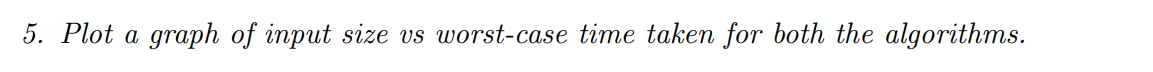

In [44]:
list_num=[11,2,3,44,5,6,7]

In [45]:
def digit_sum(list_num):
  digit_list=[]
  for num in list_num:
    j=0

    for i in range(len(str(num))):
      j+=1
    digit_list.append(j)
  return digit_list


In [46]:
Set1= [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24]
Set2= [3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 19, 21, 23]
Set3= [3, 4, 6, 6, 9, 11, 11, 12, 15, 17, 17, 17, 18, 21, 21, 24]
Set4= [2, 3, 4, 7, 11, 11, 12, 13, 13, 14, 14, 16, 19, 21, 22, 24]
Set=[Set1,Set2,Set3,Set4]
Target1= [140]
Target2= [165]
Target3= [182]
target=[[140],[165],[182]]

In [47]:
set_sum1=sum(digit_sum(Set1))
set_sum2=sum(digit_sum(Set2))
set_sum3=sum(digit_sum(Set3))
set_sum4=sum(digit_sum(Set4))
target_digit=[]
for num in target:
  target_digit.append(sum(digit_sum(num)))
len_set=[]
for i in Set:
  len_set.append(sum(digit_sum([len(i)])))
print(len_set)
print(target_digit)

[2, 2, 2, 2]
[3, 3, 3]


In [48]:
time_algo_1

[[0.016705751419067383, 0.022821903228759766, 0.020166873931884766],
 [0.008014678955078125, 0.026581287384033203, 0.03592991828918457],
 [0.007981300354003906, 0.019934892654418945, 0.023634910583496094],
 [0.01118159294128418, 0.020540475845336914, 0.026282548904418945]]

In [49]:
def max_time_function(algo):
  max_time=[]
  index_list=[]
  for time_list in algo:
    time=0
    ind=[]
    for j in range(len(time_list)):

      if time_list[j]>time:
        time=time_list[j]
        ind.append(j)
        #print(ind)

    index_list.append(max(ind))
    max_time.append(time)
  return max_time,index_list

In [50]:
# max_time=[]
# index_list=[]
# for time_list in time_algo_1:
#   time=0
#   ind=[]
#   for j in range(len(time_list)):

#     if time_list[j]>time:
#       time=time_list[j]
#       ind.append(j)
#       #print(ind)

#   index_list.append(max(ind))
#   max_time.append(time)
# max_time
# index_list

In [51]:
max_time_1,index_list_1=max_time_function(time_algo_1)
max_time_2,index_list_2=max_time_function(time_algo_2)

In [52]:
input_size=[]
for i in range(len(Set)):
  selected_set=Set[i]
  sum_digit_set=sum(digit_sum(selected_set))
  sum_target=target_digit[index_list_1[i]]
  sum_set=len_set[i]
  input=sum_digit_set+sum_target+sum_set
  input_size.append(input)
input_size

[28, 30, 32, 33]

In [53]:
max_time_1,index_list_1

([0.022821903228759766,
  0.03592991828918457,
  0.023634910583496094,
  0.026282548904418945],
 [1, 2, 2, 2])

In [60]:
max_time_2,index_list_2

([0.0011439323425292969,
  0.0011546611785888672,
  0.0009608268737792969,
  0.0013360977172851562],
 [2, 2, 0, 2])

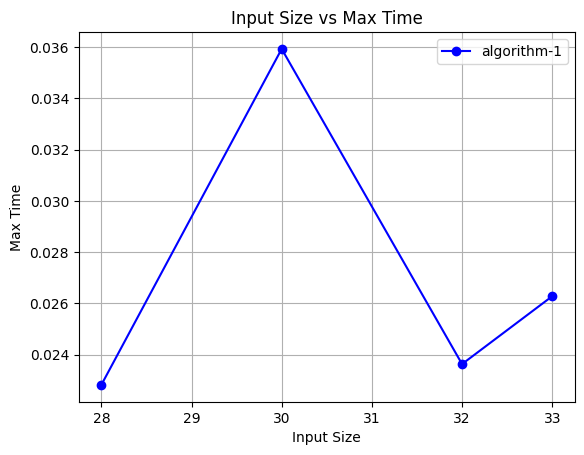

In [62]:
#Algorithm-1 max time plot
max_time,index_list=max_time_function(time_algo_1)
plt.plot(input_size, max_time, marker='o', linestyle='-',color='blue',label='algorithm-1')
plt.title('Input Size vs Max Time')
plt.xlabel('Input Size')
plt.ylabel('Max Time')
plt.grid(True)
plt.legend()
plt.show()

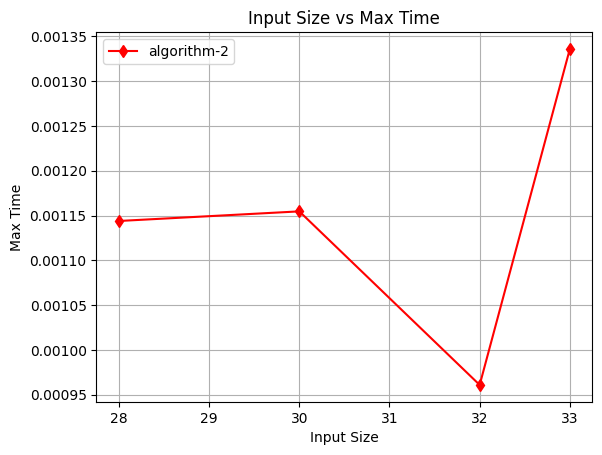

In [58]:
max_time,index_list=max_time_function(time_algo_2)
plt.plot(input_size, max_time, marker='d', linestyle='-',color='red',label='algorithm-2')
plt.title('Input Size vs Max Time')
plt.xlabel('Input Size')
plt.ylabel('Max Time')
plt.grid(True)
plt.legend()
plt.show()


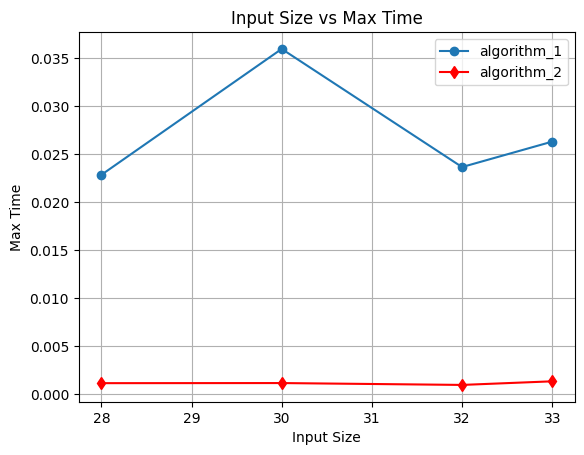

In [57]:
import matplotlib.pyplot as plt

plt.plot(input_size, max_time_1, marker='o', linestyle='-',label='algorithm_1')
plt.plot(input_size,max_time_2,marker='d',linestyle='-',color='red',label='algorithm_2')
plt.title('Input Size vs Max Time')
plt.xlabel('Input Size')
plt.ylabel('Max Time')
plt.legend()
plt.grid(True)
plt.show()


the time taken by algo 2 is very less as compare to the algo 1 as we see in diagrams and we can not say about increment and decrement of time taken by algorithm on the basis of input size as we define our input size which  is given explicitly .